### Q1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
(Show the shape and column names as well.)
#### Sol.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [21]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['BIKE DETAILS.csv']))

# display first 10 rows
print(df.head(10), "\n")

# show the shape of dataframe
print("Shape of the data frame is - ", df.shape, "\n")

# display the column name
print("Column names is - ", df.columns, "\n")

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

### Q2. Check for missing values in all columns and describe your approach for handling them.
#### Sol.

In [29]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['BIKE DETAILS.csv']))

# check for missing values
missing_value = df.isnull().sum()
print(missing_value, "\n")

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64 



#### Only column "ex_showroom_price" has missing value and count of missing value is 435.



#### Approach for Handling Missing Values
* Identify: Quantify missing values for each column using the above code to understand which columns have significant gaps.
* Drop or Impute:
  * For columns with low percentage of missing values: Use imputation (mean/median for numeric, mode for categorical) if the column is important to your analysis.
  * For columns with high missing rates: Consider dropping those columns, or rows, if they don't provide essential information and can't be reliably imputed.

* Domain Knowledge: Always validate imputations or drops based on domain knowledge and the impact on downstream analysis.

This systematic approach ensures data integrity for further analysis or modeling.

### Q3.  Plot the distribution of selling prices using a histogram and describe the overall trend.
#### Sol.

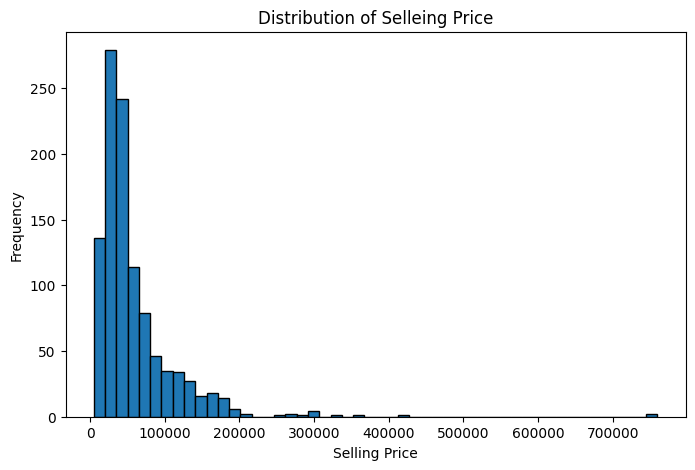

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins = 50, edgecolor = "black")
plt.title("Distribution of Selleing Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

##### Description of Overall Trend :-
* The distribution is right-skewed (positively skewed).
* Most bikes are sold in the lower price range (below ₹1,00,000).
* A few high-priced bikes create a long tail on the right, indicating the presence of outliers or premium models.
* The peak frequency is in the range of ₹20,000 to ₹80,000, suggesting that most bikes fall in the budget-to-mid segment.

### Q4.  Create a bar plot to visualize the average selling price for each seller_type and write one observation.
#### Sol.

In [39]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

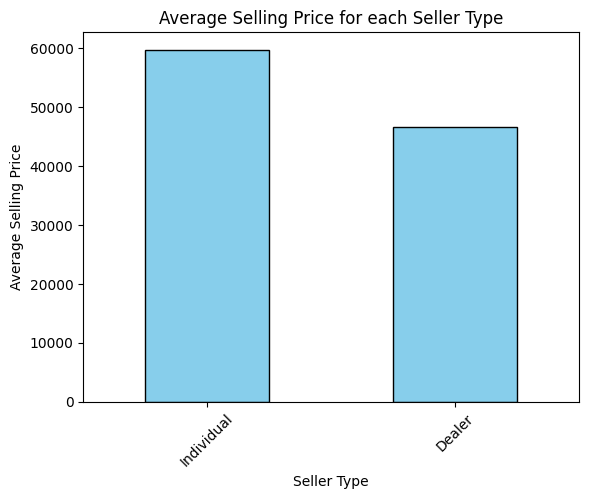

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# average selling price for each seller
avg_selling_price_for_each_seller = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending = False)


# bar plot to visualize the average selling price for each seller_type

avg_selling_price_for_each_seller.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')
plt.title('Average Selling Price for each Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation = 45)
plt.show()

#### Seller type "Individual" has more average seeling price than the seller type "Dealer".

### Q5. Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
#### Sol.

In [47]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Avg_km_driven_each_owner = df.groupby('owner')['km_driven'].mean().sort_values(ascending=False).reset_index(name = 'Avg_km_driven_by_each_owner')
print(Avg_km_driven_each_owner)


       owner  Avg_km_driven_by_each_owner
0  4th owner                311500.000000
1  2nd owner                 39288.991870
2  3rd owner                 33292.181818
3  1st owner                 32816.583333


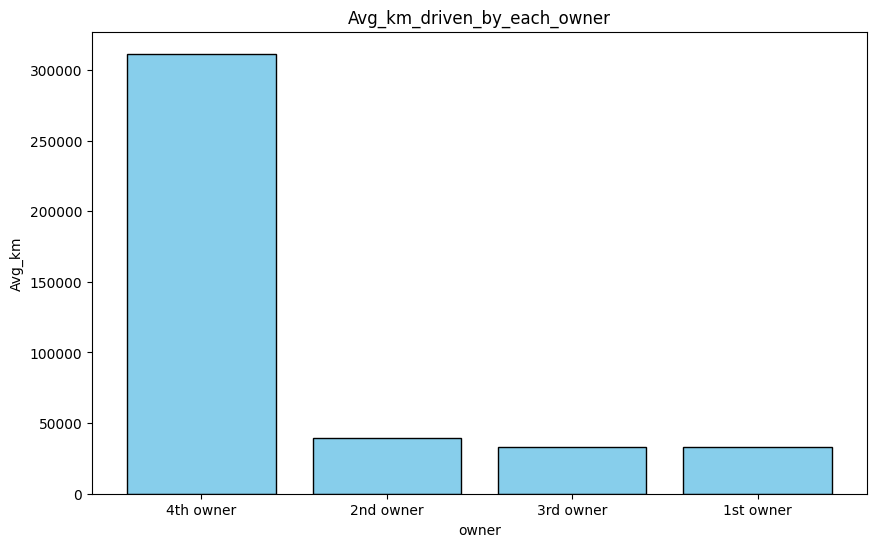

In [54]:
# Bar plot

plt.figure(figsize=(10,6))
plt.bar(Avg_km_driven_each_owner['owner'], Avg_km_driven_each_owner['Avg_km_driven_by_each_owner'], color = 'skyblue', edgecolor = 'black')
plt.title('Avg_km_driven_by_each_owner')
plt.xlabel('owner')
plt.ylabel('Avg_km')
plt.show()

### Q6.  Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
#### Sol.

In [68]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['BIKE DETAILS.csv']))

# statistics summary before removing outliers
before_summary = df['km_driven'].describe()

# calculate IQR

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3-Q1

# Calculate lower bound and upper bound for outlier
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# filter out outlier
filtered_df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# statistics summary after removing outliers
after_summary = filtered_df['km_driven'].describe()


print("Statistics Summary before removing outlier:\n", before_summary, "\n")
print("Statistics Summary after removing outlier:\n", after_summary)

Statistics Summary before removing outlier:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64 

Statistics Summary after removing outlier:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


### Q7. Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
#### SOl.

In [69]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


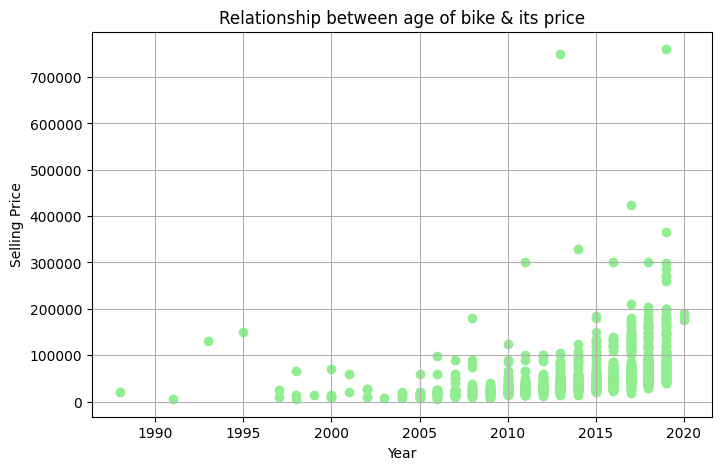

In [75]:
# scatter plot

plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], color = 'lightgreen')
plt.title('Relationship between age of bike & its price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

### Q8. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
### Sol.

In [76]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [77]:
import pandas as pd

# One-hot encode seller_type column (create new column - seller_type_Dealer, seller_type_Individual)
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display first 5 rows
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


### Q9.Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
#### Sol.

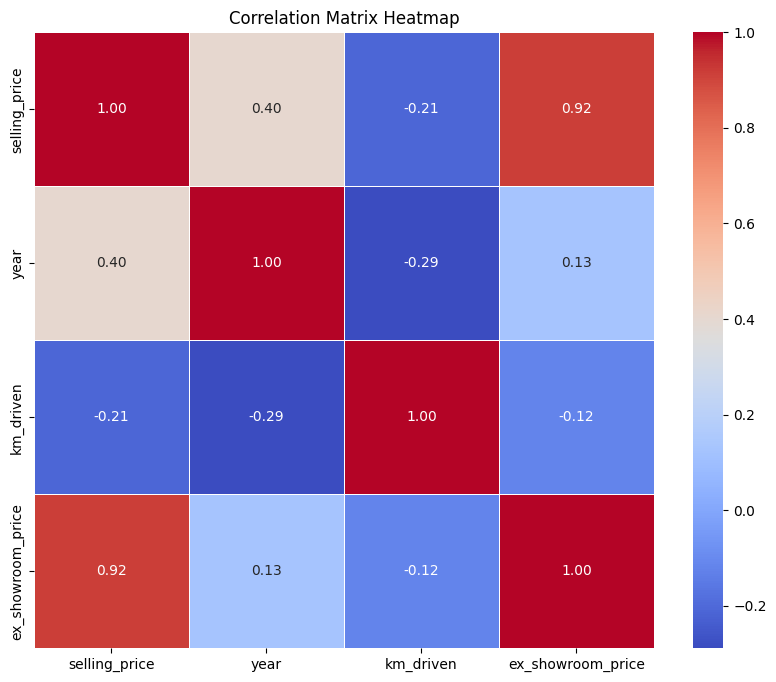

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Print correlation matrix for reference
print(corr_matrix)


#### Correlation Insights to Look For
* Positive or negative correlations close to 1 or -1 stand out as strong relationships.

* For example, often the price columns correlate with the year of manufacture, or kilometers driven inversely correlates with selling price.

* The heatmap visualization will help to see these patterns clearly for all numeric columns.

### Q10.  Summarize your findings in a brief report:
* What are the most important factors affecting a bike's selling price?
* Mention any data cleaning or feature engineering you performed.
#### Sol.
#### Important Factors Affecting Bike Selling Price
* Year of Manufacture: Newer bikes tend to have higher selling prices, showing a positive correlation between year and price.

* Kilometers Driven: There is a negative correlation between kilometers driven and selling price, meaning bikes with lower usage tend to sell for more.

* Ex-showroom Price: This original price of the bike strongly correlates with the selling price, reflecting the bike's base market value.

* Other factors like bike model/variant, owner type, and seller type may also influence price, but numeric features have more measurable impact in this dataset.

#### Data Cleaning and Feature Engineering
* Missing Values: Missing data was identified and handled by either imputation or exclusion to maintain data integrity.

* Outlier Removal: The Interquartile Range (IQR) method was used to detect and remove outliers in the km_driven column, reducing noise in the data.

* One-Hot Encoding: The categorical variable seller_type was converted into numeric dummy variables for better model compatibility.

* Visualization: Histogram, Bar plot, Scatter plots and correlation heatmaps were used to explore relationships and validate assumptions.